In [1]:
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier


In [2]:
# Define file paths
X_train_path = 'train_test_data/X_train.pkl'
X_test_path = 'train_test_data/X_test.pkl'
Y_train_path = 'train_test_data/Y_train.pkl'
Y_test_path = 'train_test_data/Y_test.pkl'

# Load the split data from files
X_train = joblib.load(X_train_path)
X_test = joblib.load(X_test_path)
Y_train = joblib.load(Y_train_path)
Y_test = joblib.load(Y_test_path)

print("Training and validation sets have been loaded from files.")


Training and validation sets have been loaded from files.


In [3]:
import os
import multiprocessing

# Get the number of CPU cores
num_cores = os.cpu_count()
print(f"Number of CPU cores available: {num_cores}")

# Alternatively, using multiprocessing library
num_cores_mp = multiprocessing.cpu_count()
print(f"Number of CPU cores available (multiprocessing): {num_cores_mp}")
num_threads = num_cores_mp


Number of CPU cores available: 20
Number of CPU cores available (multiprocessing): 20


In [5]:
# Dictionary of models
models = {
    "XGB": XGBClassifier(n_jobs=num_threads),
    "LGBM": LGBMClassifier(n_jobs=num_threads, verbose=-1),
    "CatB": CatBoostClassifier(thread_count=num_threads, verbose=0),
    "RF": RandomForestClassifier(n_jobs=num_threads),
    "LR": LogisticRegression(n_jobs=num_threads, max_iter=1000),
}

In [6]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm

def evaluate(model, X_test, Y_test):
    pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred, average='macro')
    recall = recall_score(Y_test, pred, average='macro')
    f1 = f1_score(Y_test, pred, average='macro')
    print(classification_report(Y_test, pred))
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    print('Recall: %f' % recall)
    print('F1 score: %f' % f1)
    print("================================================================")

def plot_clf_accuracy(model_name, train_accuracy, val_accuracy):
    print("Train Accuracy     \t", train_accuracy)
    print("Validation Accuracy\t", val_accuracy)
    print("Difference Accuracy\t", train_accuracy - val_accuracy)

    plt.bar(['Training Accuracy', 'Validation Accuracy'], [train_accuracy, val_accuracy])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.show()

def plot_feature_importances(importances, feature_names):
    sorted_indices = importances.argsort()[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_feature_names = [feature_names[i] for i in sorted_indices]

    plt.bar(range(len(importances)), sorted_importances)
    plt.xticks(range(len(importances)), sorted_feature_names, rotation=90)
    plt.title('Feature Importances')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

def plot_eval(model, model_name, X_train, Y_train, X_test, Y_test):
    # Get training and validation accuracies
    train_accuracy = model.score(X_train, Y_train)
    val_accuracy = model.score(X_test, Y_test)

    recall_precision(model, X_test, Y_test)

    # Plot the accuracy
    plot_clf_accuracy(model_name, train_accuracy, val_accuracy)

    # Plot the feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        if isinstance(X_train, pd.DataFrame):
            feature_names = list(X_train.columns)
        else:
            feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]
        plot_feature_importances(importances, feature_names)

def recall_precision(model, X_test, Y_test):
    pred = model.predict(X_test)
    precision = precision_score(Y_test, pred, average='macro')
    recall = recall_score(Y_test, pred, average='macro')

    print("Precision          \t", precision)
    print("Recall             \t", recall)

def fi_xgb(model):
    # Get feature importances
    feature_importance_values = model.feature_importances_

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importance_values)), feature_importance_values)
    plt.title('XGB Feature Importances')
    plt.show()

def fi_lgbm(model, X_train):
    # Get feature importances and feature names
    feature_importances = model.feature_importances_
    feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]

    # Create a DataFrame for the importances
    df_importances = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    })
    # Sort the DataFrame by the importances
    df_importances = df_importances.sort_values('importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    lightgbm.plot_importance(model, importance_type='split', max_num_features=10)
    plt.title('Feature Importance')
    plt.show()


XGB
Precision          	 0.9499162849246611
Recall             	 0.8907252597664697
Train Accuracy     	 0.9999982137133735
Validation Accuracy	 0.999957129164723
Difference Accuracy	 4.1084548650482944e-05


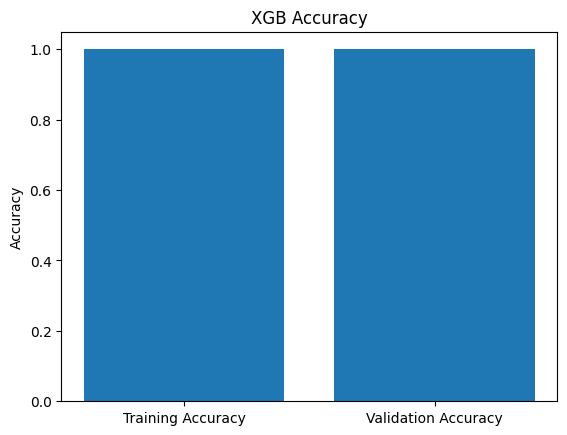

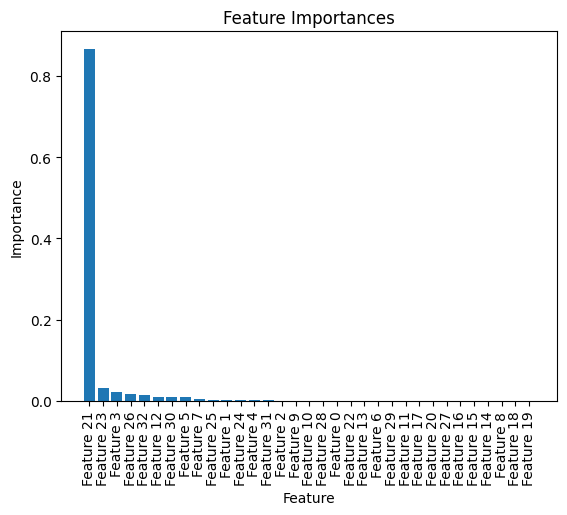

{'objective': 'multi:softprob', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': 20, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
XGB model saved to models/XGB_model.pkl

LGBM
Precision          	 0.6058096875689158
Recall           

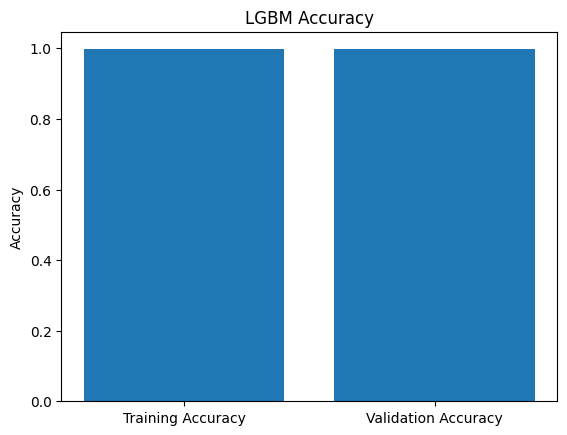

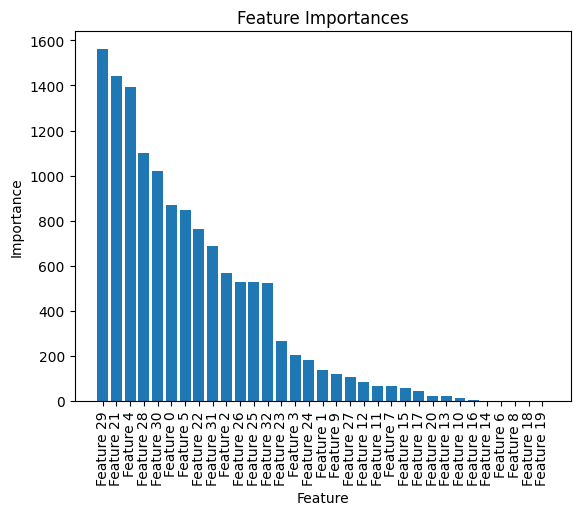

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': 20, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'verbose': -1}
LGBM model saved to models/LGBM_model.pkl

CatB
Precision          	 0.9739328846381646
Recall             	 0.9073130707286012
Train Accuracy     	 0.999985454523184
Validation Accuracy	 0.999948963291337
Difference Accuracy	 3.649123184701342e-05


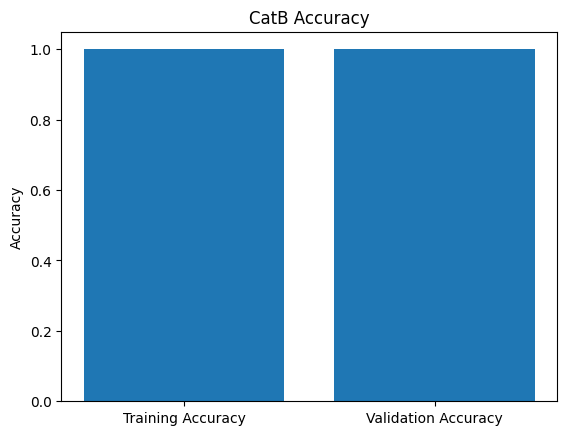

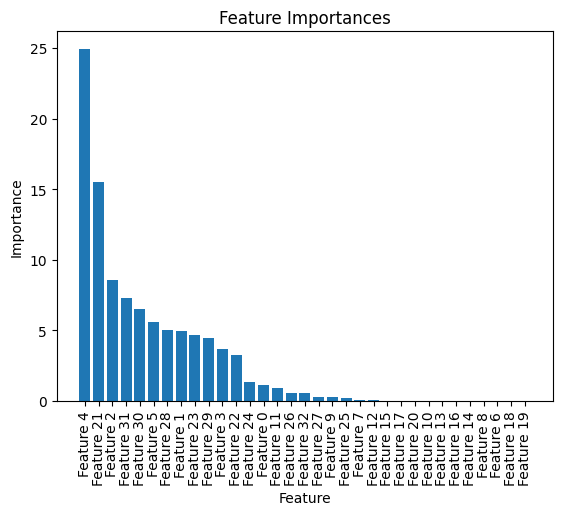

{'thread_count': 20, 'verbose': 0}
CatB model saved to models/CatB_model.pkl

RF
Precision          	 0.9915603204714513
Recall             	 0.8531031687816558
Train Accuracy     	 0.9999808612147157
Validation Accuracy	 0.99990609245606
Difference Accuracy	 7.476875865575217e-05


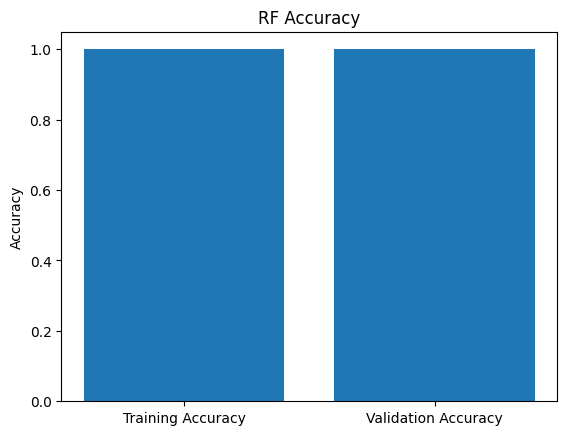

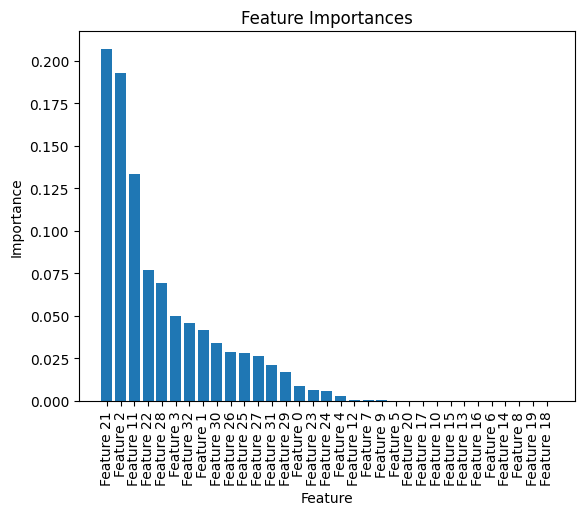

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': 20, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
RF model saved to models/RF_model.pkl

LR


c:\Users\rizni\OneDrive\Desktop\KDDCUP\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision          	 0.6249337985781411
Recall             	 0.5804376356242482
Train Accuracy     	 0.9977092149933754
Validation Accuracy	 0.99768089195835
Difference Accuracy	 2.832303502542377e-05


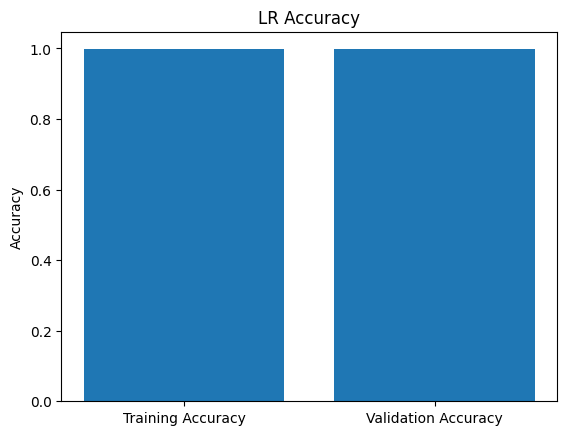

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': 20, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
LR model saved to models/LR_model.pkl



In [7]:
for name, model in models.items():
    print(name)
    if name == 'XGB':
        model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_test, Y_test)], verbose=False)
    elif name == 'LGBM':
        model.fit(X_train, Y_train, eval_set=[(X_test, Y_test), (X_test, Y_test)])
    else:
        model.fit(X_train, Y_train)

    plot_eval(model, name, X_train, Y_train, X_test, Y_test)
    print(model.get_params())

    model_path = f"models/{name}_model.pkl"
    joblib.dump(model, model_path)
    print(f"{name} model saved to {model_path}")

    print()
